# Calories_Burnt_Prediction 

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
#Dataset for calories 
calories=pd.read_csv('calories.csv')
calories.head(4)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0


In [3]:
#Dataset for body conditionabs
exercise=pd.read_csv('exercise.csv')
exercise.head(4)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5


In [4]:
#Concatinating both dataset
new_calories=pd.concat([exercise,calories['Calories']],axis=1)

In [5]:
#New calories dataset
new_calories.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


In [6]:
#Checking info of dataset
new_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
#Encoding the value of gender
le=LabelEncoder()
le.fit(new_calories["Gender"])
new_calories["Gender"]=le.transform(new_calories["Gender"])

In [8]:
#Checking for null value
new_calories.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [9]:
new_calories.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

<Axes: xlabel='Duration', ylabel='Calories'>

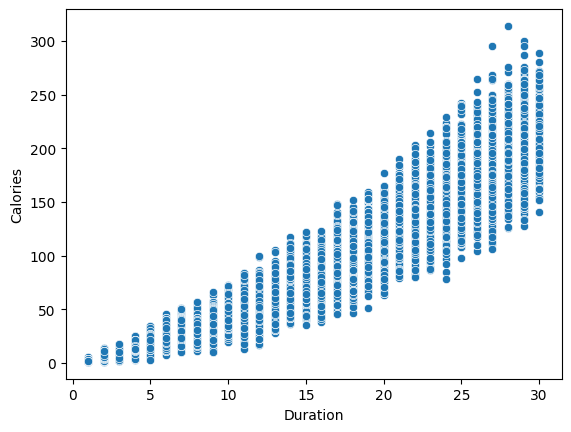

In [10]:
#Visualizing regression dataset
sns.scatterplot(x="Duration",y="Calories",data=new_calories)

<Axes: ylabel='count'>

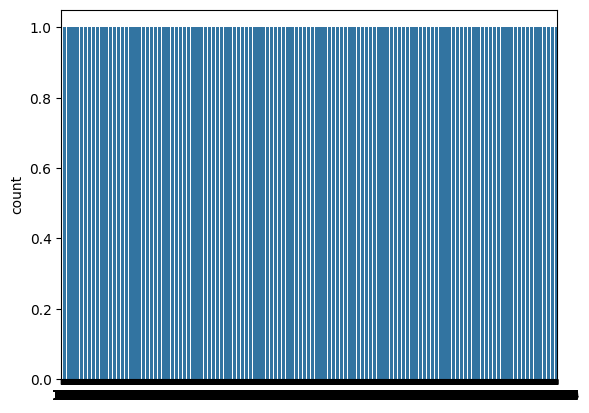

In [11]:
#Checking for destribution in dataset
sns.countplot(new_calories['Gender'])

In [12]:
#Visualizing correlation among columns in dataset
correlation=new_calories.corr()

<Axes: >

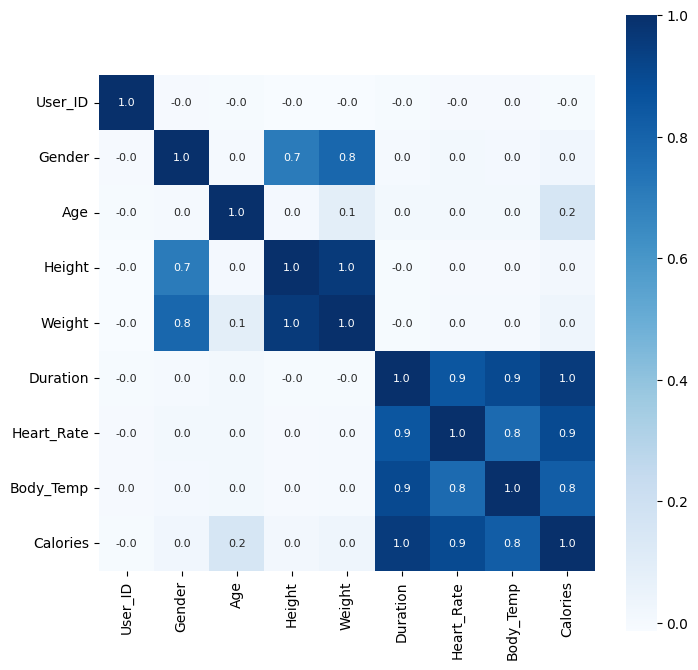

In [20]:
#Using heatmap to represent correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [22]:
#Seperating dataset into input and output
x=new_calories.drop(columns=['User_ID','Calories'],axis=1)
y=new_calories['Calories']

In [23]:
#splitting dataset into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Training model

In [24]:
#Using XGBRegresser machine learning model
model=XGBRegressor()

In [25]:
#Training mmodel
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
#Predicting the value of mmodel
test_data_prediction=model.predict(X_test)

In [34]:
print(test_data_prediction)

[172.07645  195.7858    51.708874 ... 121.50776   19.239851 214.43597 ]


In [41]:
model.score(X_test,Y_test)

0.9988678909361673

Mean Absolute Error

In [36]:
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [37]:
print("Absolute Mean Error : ",mae)

Absolute Mean Error :  1.4981198125282924
